 #  Unit 4 Homework Assignment: A Whale Off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [364]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

In [368]:
# Set the file paths
whale_data = Path("Resources/whale_returns.csv")
algo_data = Path("Resources/algo_returns.csv")
sptsx_data = Path("Resources/sp_tsx_history.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sptsx_df = pd.read_csv(sptsx_data, index_col="Date", infer_datetime_format=True, parse_dates=True)


## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [369]:
# Display a few rows from one DataFrame
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [370]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [384]:
# Drop nulls and sort index
whale_df = whale_df.dropna()
whale_df=whale_df.sort_index()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [372]:
# Display a few rows from one DataFrame
algo_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [373]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [385]:
# Drop nulls and sort index
algo_df=algo_df.dropna()
algo_df=algo_df.sort_index()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [386]:
# Display a few rows from one DataFrame
sptsx_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [376]:
# Check Data Types
sptsx_df["Close"].head

<bound method NDFrame.head of Date
2012-10-01    $12,370.19
2012-10-02    $12,391.23
2012-10-03    $12,359.47
2012-10-04    $12,447.68
2012-10-05    $12,418.99
                 ...    
2019-12-20    $17,118.44
2019-12-23    $17,128.71
2019-12-24    $17,180.15
2019-12-27    $17,168.21
2019-12-30    $17,098.56
Name: Close, Length: 1818, dtype: object>

In [377]:
# Fix Data Types
sptsx_df["Close"] = sptsx_df["Close"].str.replace("$", "")
sptsx_df["Close"] = sptsx_df["Close"].str.replace(",", "")
sptsx_df["Close"] = sptsx_df["Close"].astype('float')
sptsx_df["Close"].head

C:\Users\Samadi\AppData\Local\Temp\ipykernel_17128\440279694.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sptsx_df["Close"] = sptsx_df["Close"].str.replace("$", "")


<bound method NDFrame.head of Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: float64>

In [378]:
# Calculate Daily Returns
sptsx_returns = sptsx_df.pct_change()
sptsx_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [387]:
# Drop nulls and sort index
sptsx_returns=sptsx_returns.dropna()
sptsx_returns=sptsx_returns.sort_index()
sptsx_returns.isnull().sum()

S&P TSX 60    0
dtype: int64

In [388]:
# Rename `Close` Column to be specific to this portfolio.
sptsx_returns.columns = ["S&P TSX 60"]
sptsx_returns.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [389]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sptsx_returns], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df=combined_df.sort_index()

combined_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358,-0.004703


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

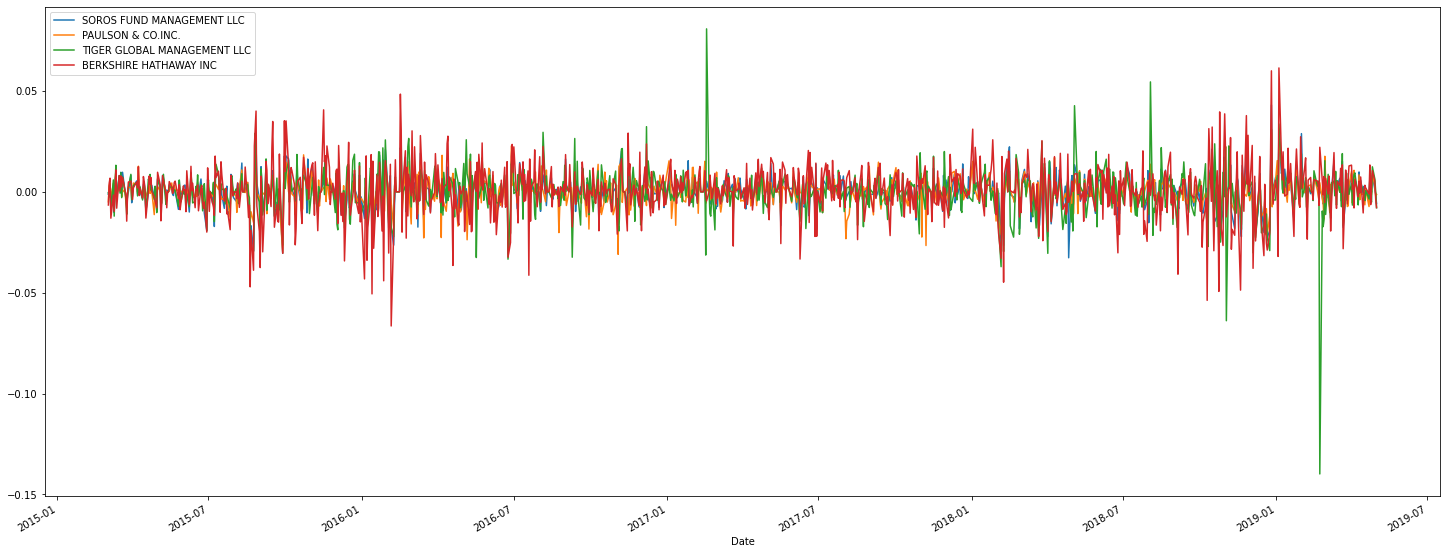

In [390]:
# Plot daily returns of Whale portfolio
whale_df.plot(figsize=(25,10))

<AxesSubplot:xlabel='Date'>

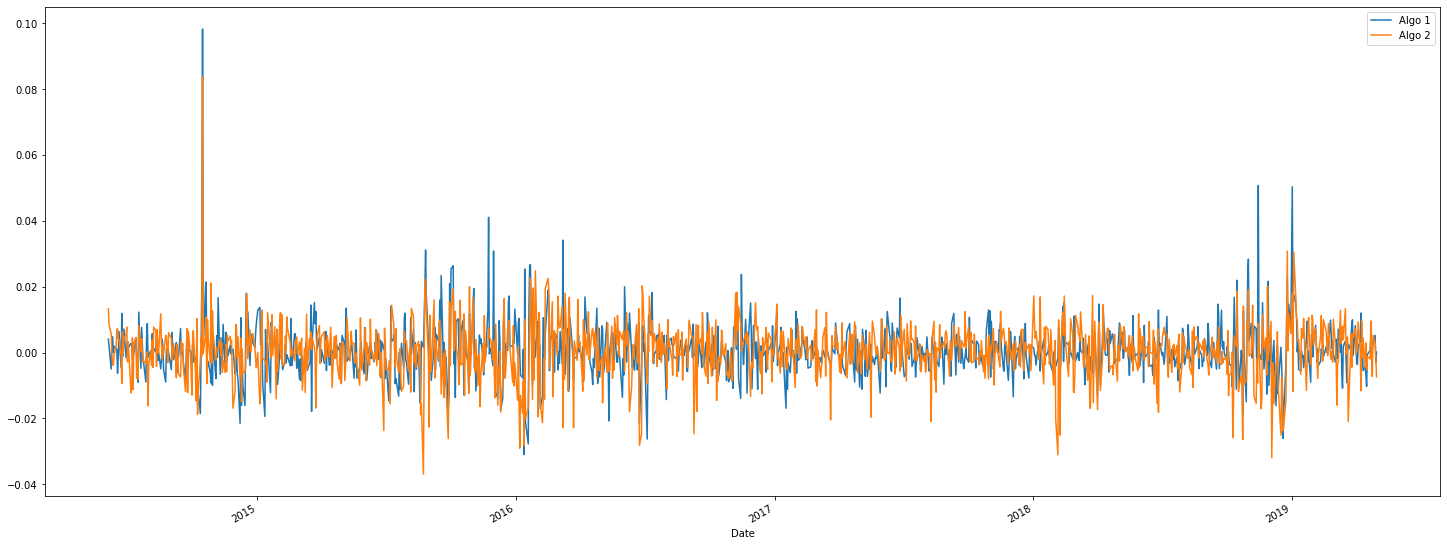

In [391]:
# Plot daily returns of Alg portfolio
algo_df.plot(figsize=(25,10))

<AxesSubplot:xlabel='Date'>

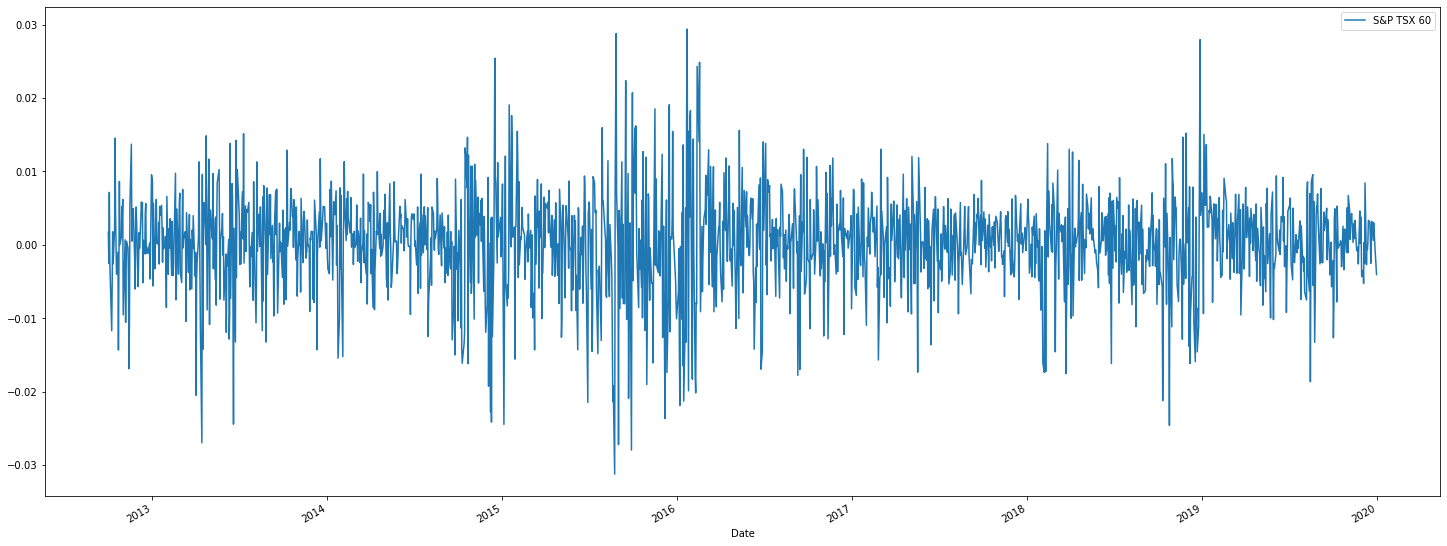

In [392]:
# Plot daily returns of S&P TSX 60
sptsx_returns.plot(figsize=(25,10))

<AxesSubplot:xlabel='Date'>

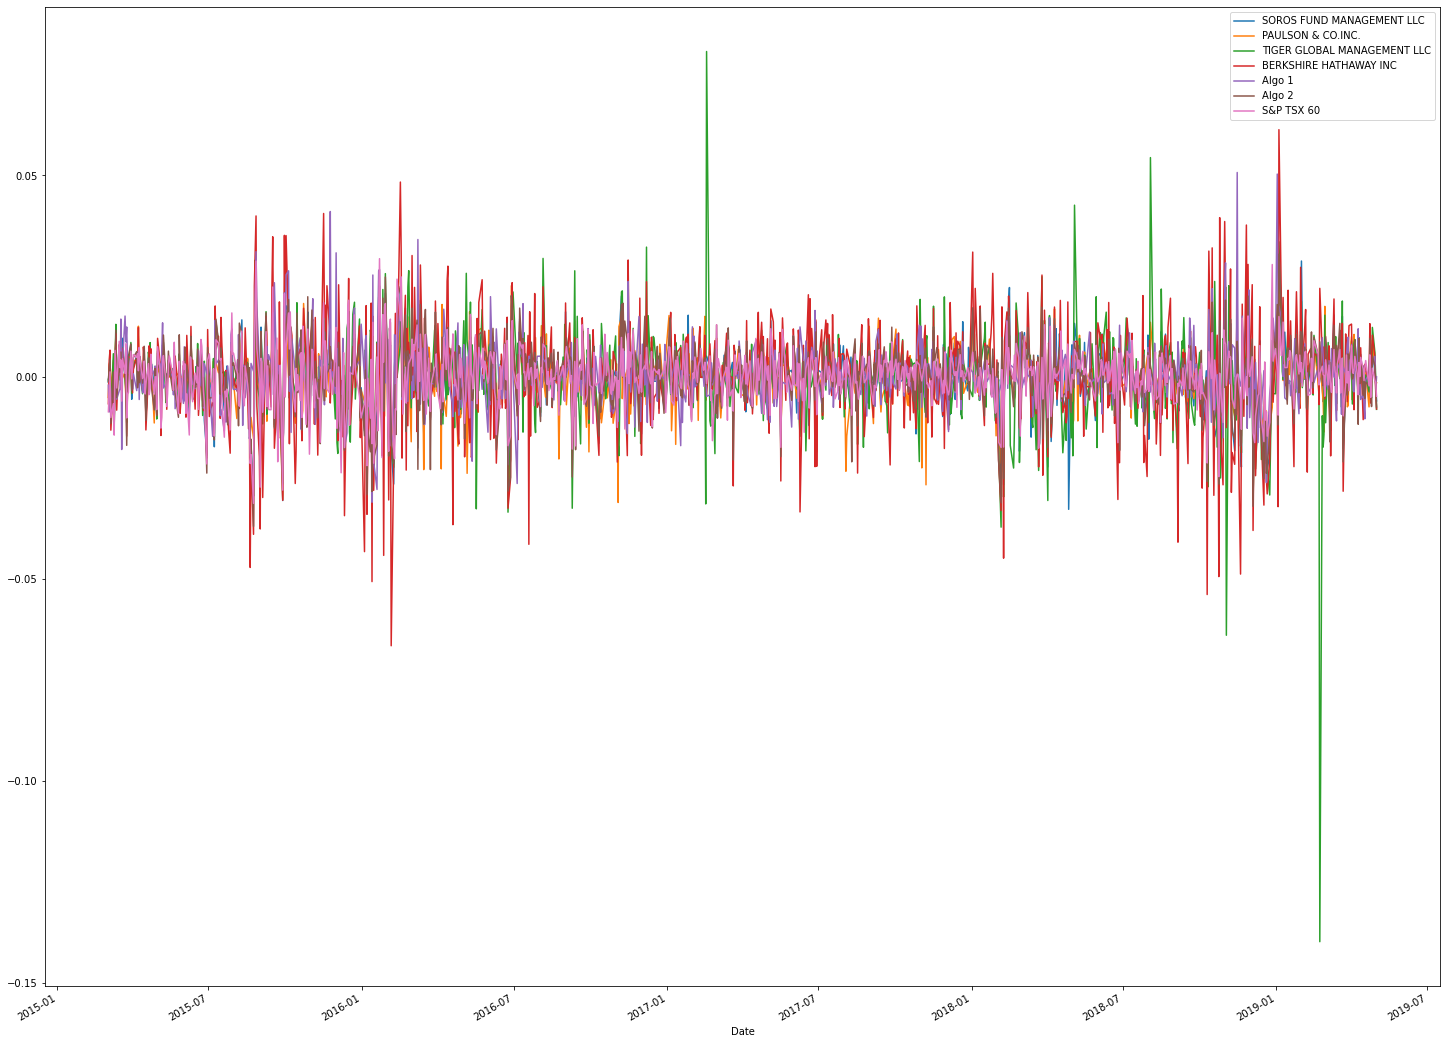

In [394]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(25,20))

#### Calculate and Plot cumulative returns.

In [396]:
# Use the `dot` function to multiply the weights by each stock's daily return to get the portfolio daily return
weights = [0.25, 0.25, 0.25, 0.25]
whale_df_w = whale_df.dot(weights)

# Calculate cumulative returns of Whale Portfo
whale_cumulative = (1 + whale_df_w).cumprod()-1

# Display sample values
whale_cumulative.head(10)

Date
2015-03-03   -0.003328
2015-03-04   -0.001546
2015-03-05    0.002741
2015-03-06   -0.005547
2015-03-09   -0.003310
2015-03-10   -0.012634
2015-03-11   -0.009835
2015-03-12    0.000674
2015-03-13   -0.003270
2015-03-16    0.003581
dtype: float64

In [397]:
# Use the `dot` function to multiply the weights by each stock's daily return to get the portfolio daily return
weights = [0.5, 0.5]
algo_df_w = algo_df.dot(weights)

# Calculate cumulative returns of Algo portfo
algo_cumulative = (1 + algo_df_w).cumprod()-1

# Display sample values
algo_cumulative.head(10)

Date
2014-06-05    0.008674
2014-06-06    0.013788
2014-06-09    0.014121
2014-06-10    0.015982
2014-06-11    0.016489
2014-06-12    0.014523
2014-06-13    0.015082
2014-06-16    0.016562
2014-06-17    0.020522
2014-06-18    0.020994
dtype: float64

In [398]:
# Calculate cumulative returns of S&P TSX 60
sptsx_cumulative = (1 + sptsx_returns).cumprod()-1

# Display sample values
sptsx_cumulative.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.000867
2012-10-04,0.006264
2012-10-05,0.003945
2012-10-09,-0.007811


<AxesSubplot:xlabel='Date'>

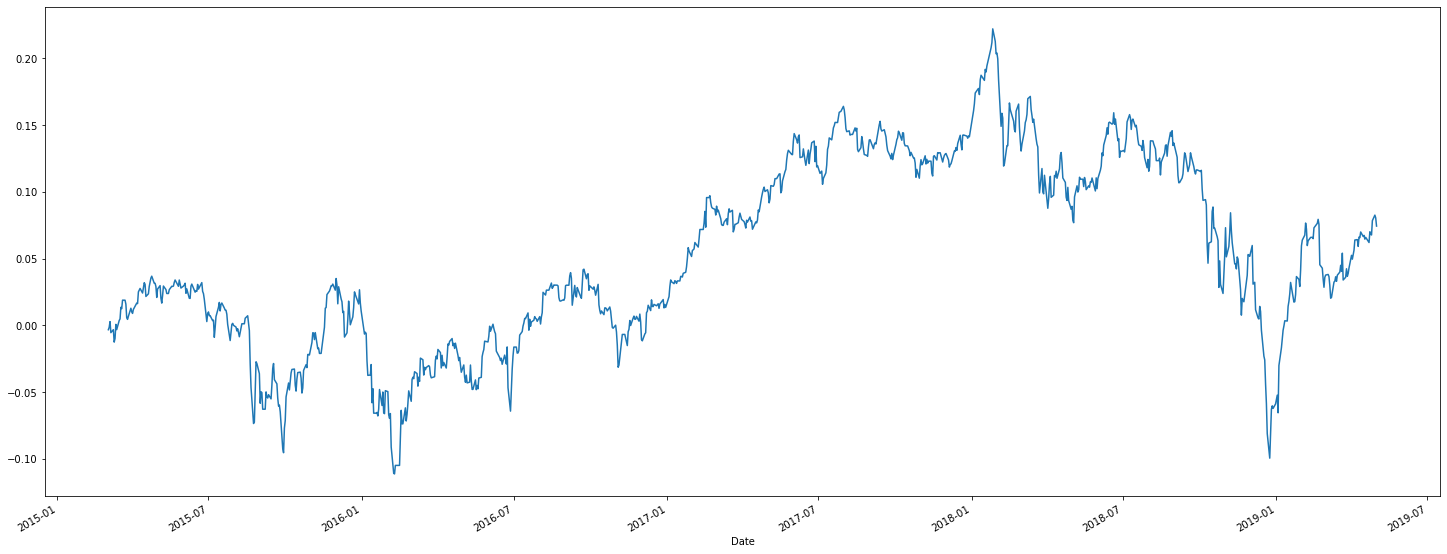

In [194]:
# Plot cumulative return of whale portfo
whale_cumulative.plot(figsize=(25,10))

<AxesSubplot:xlabel='Date'>

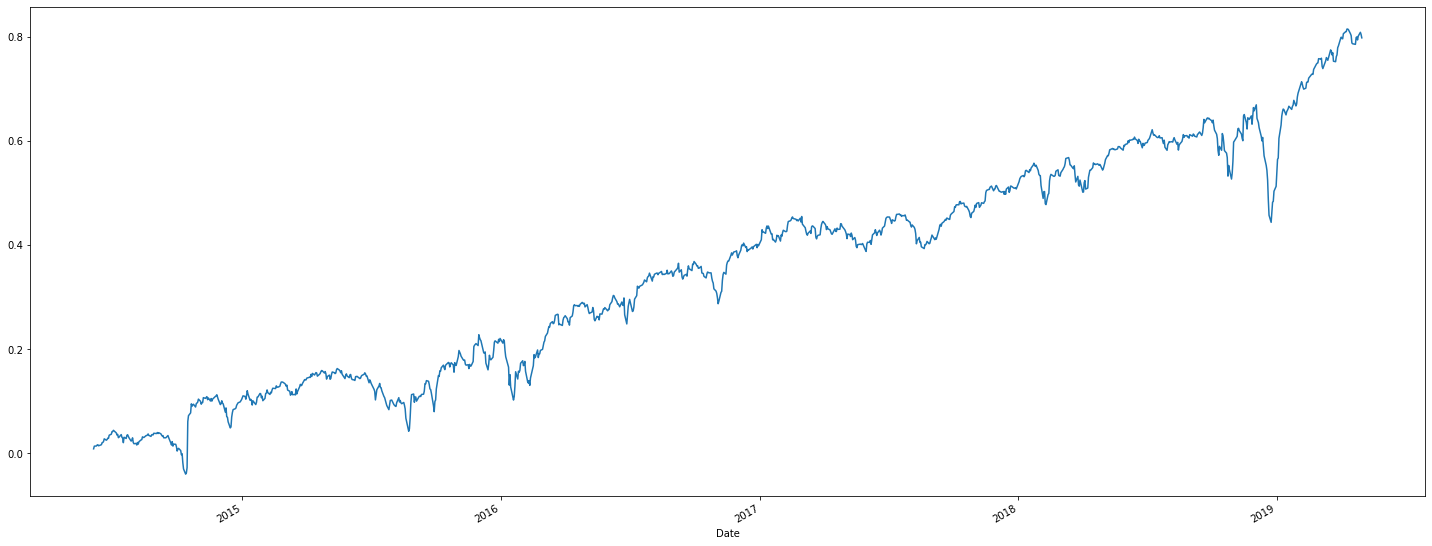

In [195]:
# Plot cumulative return of Algo portfo
algo_cumulative.plot(figsize=(25,10))

<AxesSubplot:xlabel='Date'>

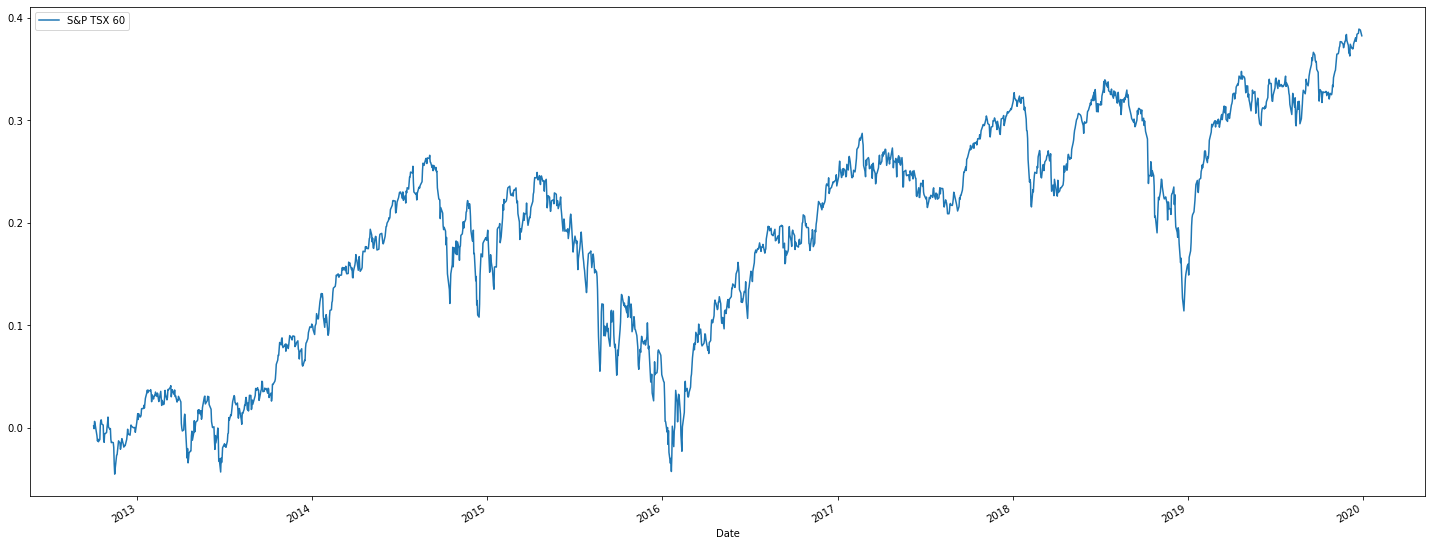

In [196]:
# Plot cumulative return of S&P TSX 60
sptsx_cumulative.plot(figsize=(25,10))

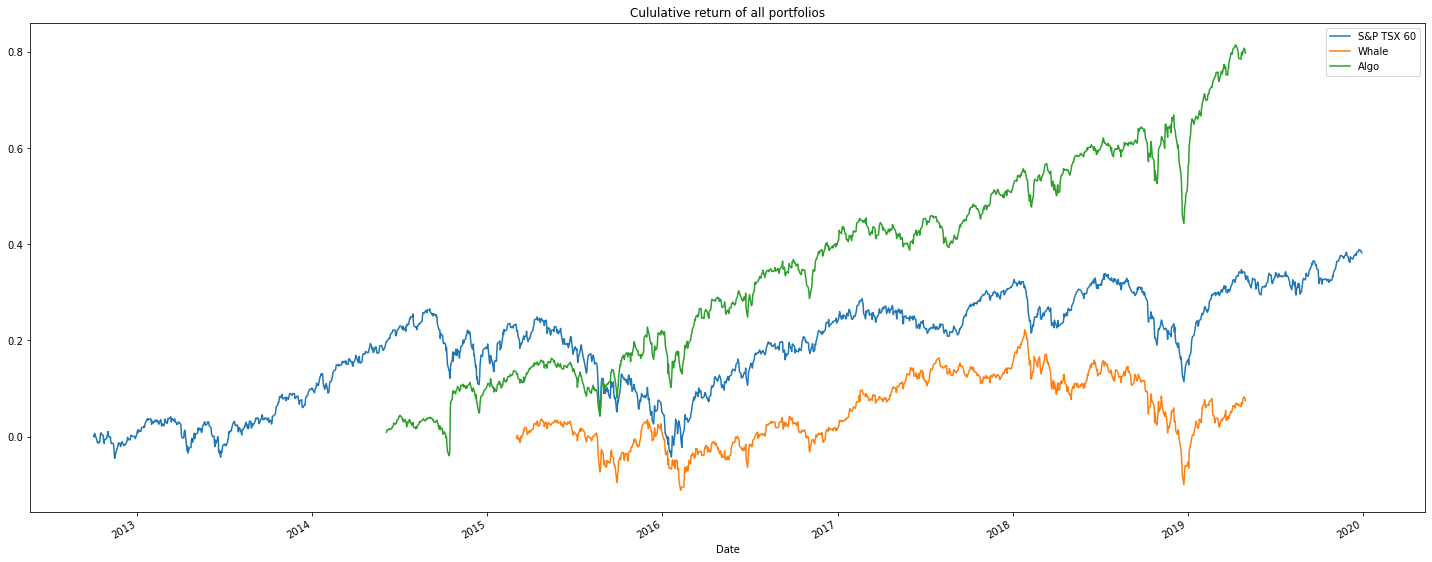

In [400]:
# Plot cumulative return of all portfolios
ax= sptsx_cumulative.plot(figsize=(25,10), title="Cululative return of all portfolios")
whale_cumulative.plot(ax=ax)
algo_cumulative.plot(ax=ax)

ax.legend(["S&P TSX 60", "Whale", "Algo"])

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

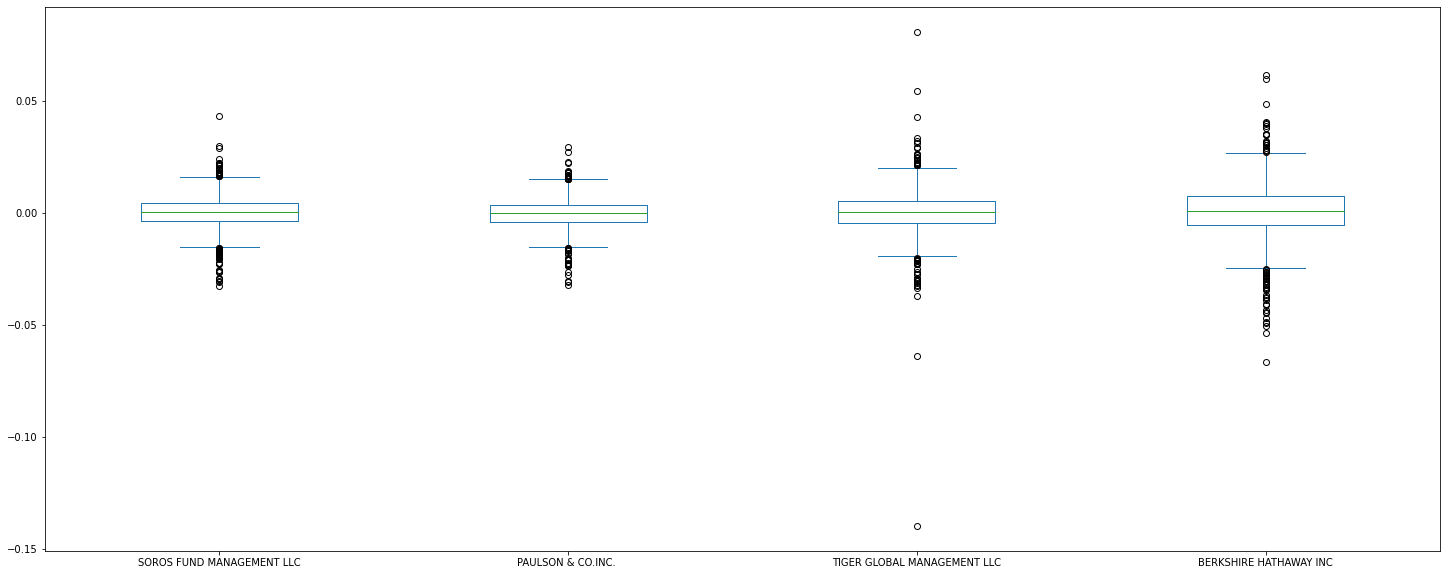

In [401]:
# Box plot to visually show risk Whale portfolio
whale_df.plot.box(figsize=(25,10))

<AxesSubplot:>

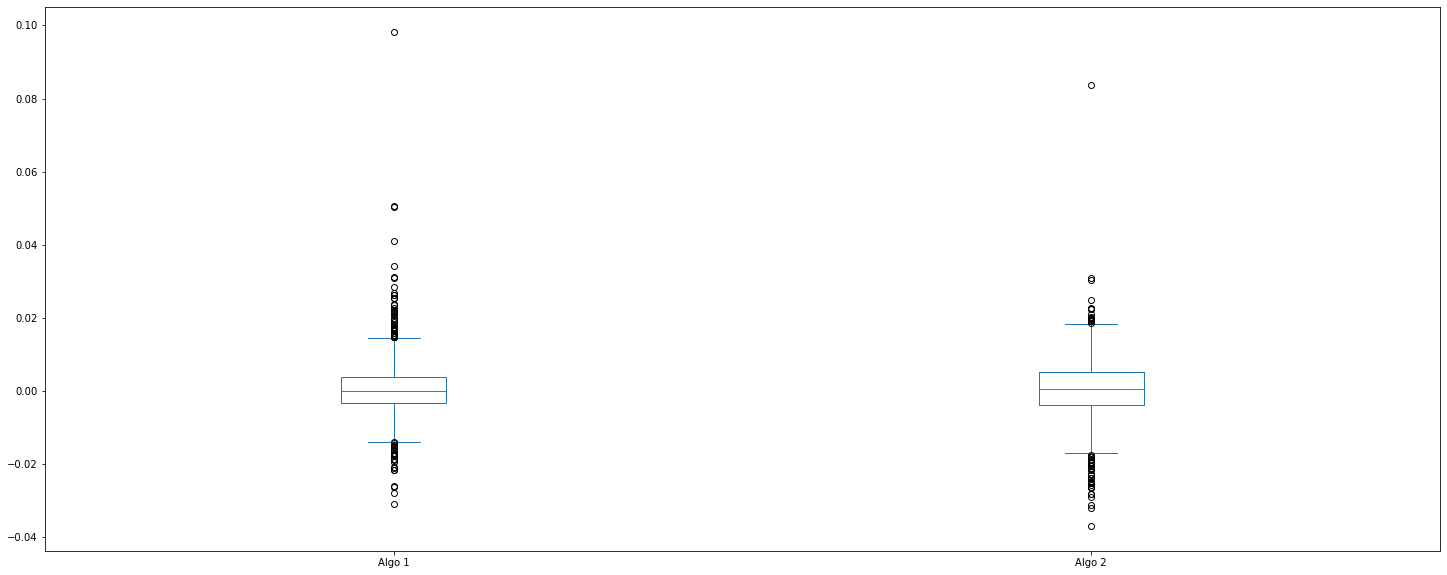

In [402]:
# Box plot to visually show risk Algo portfolio
algo_df.plot.box(figsize=(25,10))

<AxesSubplot:>

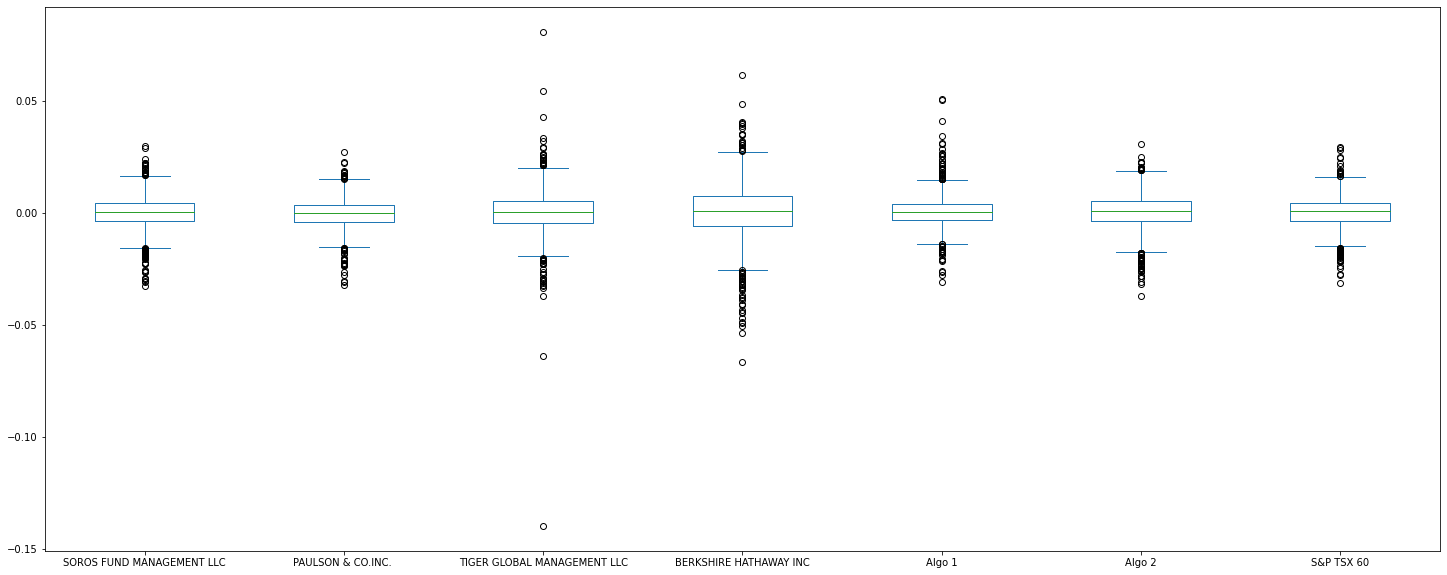

In [403]:
# Box plot to visually show risk all
combined_df.plot.box(figsize=(25,10))

### Calculate Standard Deviations

In [404]:
# Calculate the daily standard deviations of Whale portfolio
whale_portfolio_std = whale_df.std()
whale_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [405]:
# Calculate the daily standard deviations of Algo portfolio
algo_portfolio_std = algo_df.std()
algo_portfolio_std

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [417]:
# Calculate the daily standard deviation of S&P TSX 60
sptsx_std = sptsx_returns.std()

# Determine which portfolios are riskier than the S&P TSX 60
print (f"S&P TSX 60 std: {sptsx_std.mean()}, that less than Whale portfolio std ({whale_portfolio_std.mean()}) and Algo portfolio std ({algo_portfolio_std.mean()}), so both of them are risker than S&P TSX 60.")

S&P TSX 60 std: 0.006637362556692504, that less than Whale portfolio std (0.009618471704135888) and Algo portfolio std (0.008227087477314397), so both of them are risker than S&P TSX 60.


### Calculate the Annualized Standard Deviation

In [422]:
# Calculate the annualized standard deviation (252 trading days)- Whale
whale_std_annual = whale_df.std() * np.sqrt(252)
whale_std_annual

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [421]:
# Calculate the annualized standard deviation (252 trading days)- Algo
algo_std_annual = algo_df.std() * np.sqrt(252)
algo_std_annual

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [420]:
# Calculate the annualized standard deviation (252 trading days)- S&P TSX 60
sp_std_annual = sptsx_returns.std() * np.sqrt(252)
sp_std_annual

S&P TSX 60    0.105365
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

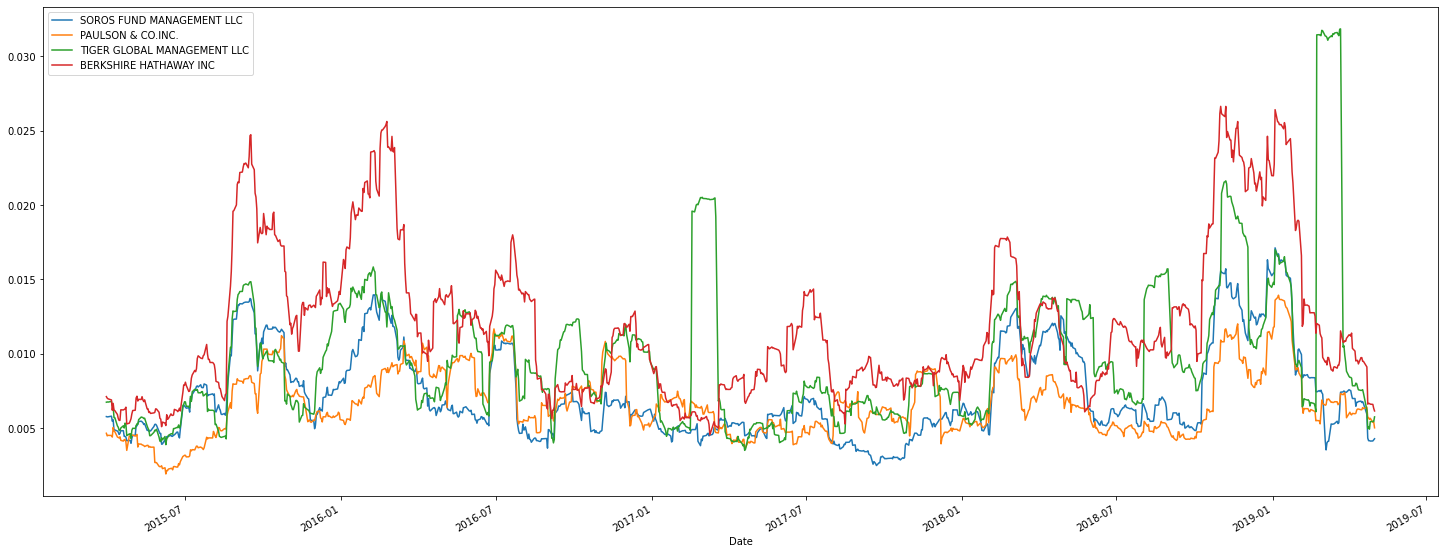

In [423]:
# Calculate the rolling standard deviation for whale portfolio using a 21-day window
whale_21 = whale_df.rolling(window=21).std()

# Plot the rolling standard deviation
whale_21.plot(figsize=(25,10))

<AxesSubplot:xlabel='Date'>

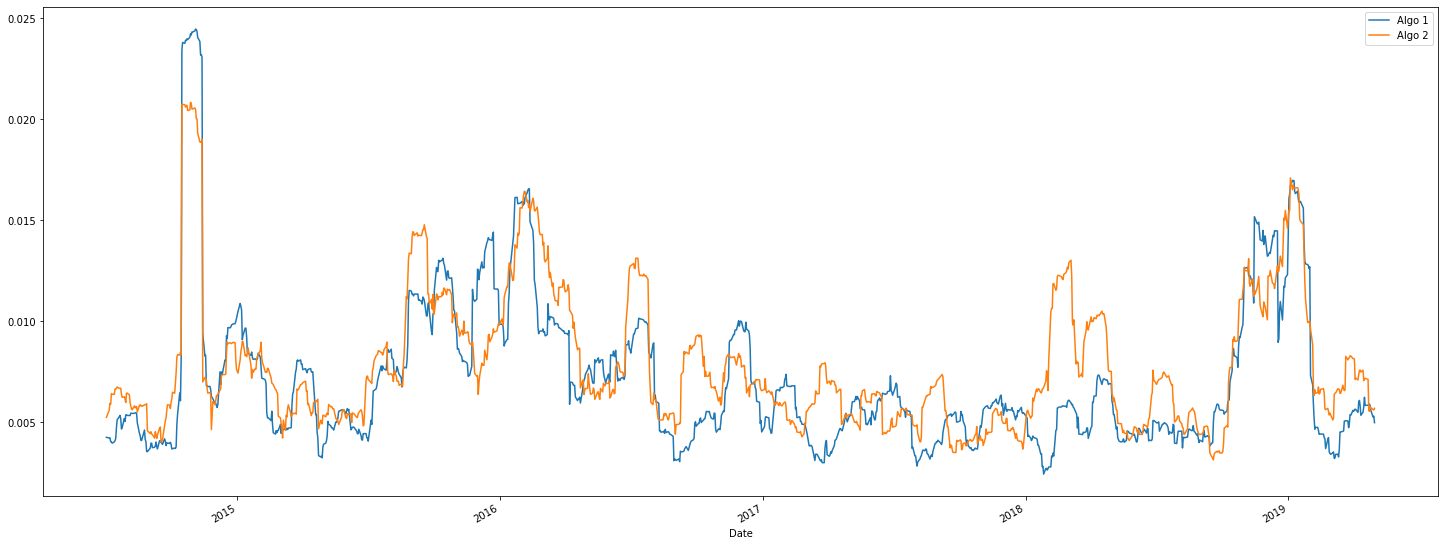

In [424]:
# Calculate the rolling standard deviation for Algo portfolio using a 21-day window
algo_21 = algo_df.rolling(window=21).std()

# Plot the rolling standard deviation
algo_21.plot(figsize=(25,10))

<AxesSubplot:xlabel='Date'>

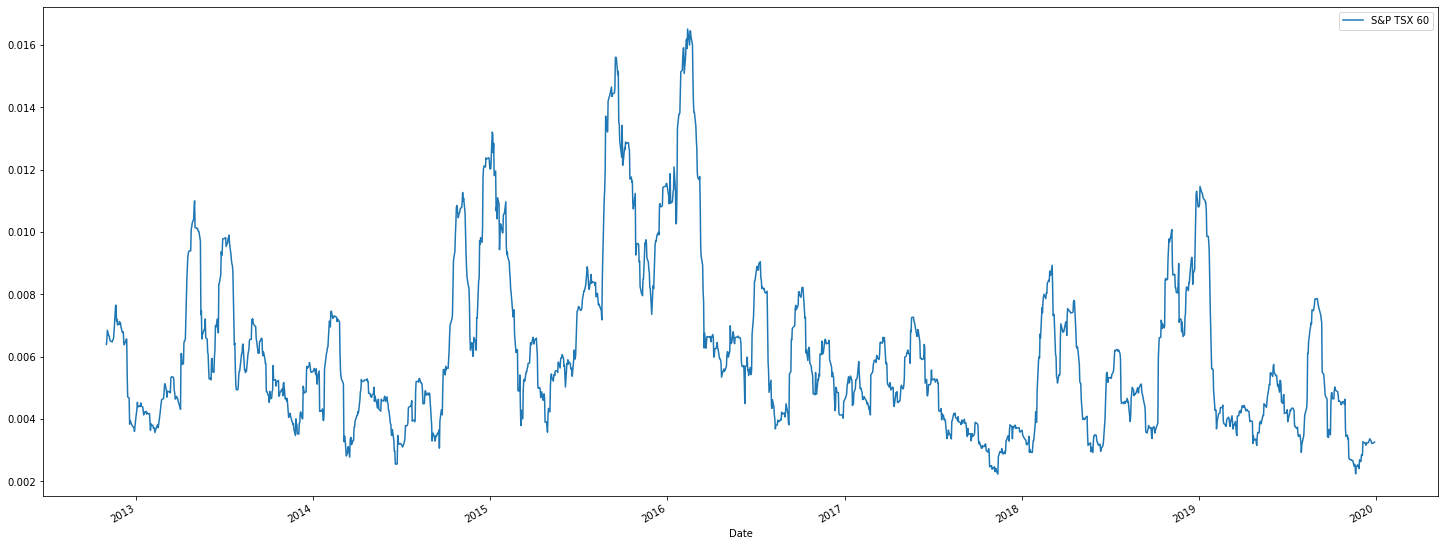

In [425]:
# Calculate the rolling standard deviation for S&P TSX 60 portfolio using a 21-day window
sp_21 = sptsx_returns.rolling(window=21).std()

# Plot the rolling standard deviation
sp_21.plot(figsize=(25,10))

<AxesSubplot:title={'center':'Rolling standard deviation for portfolios using a 21-day window'}, xlabel='Date'>

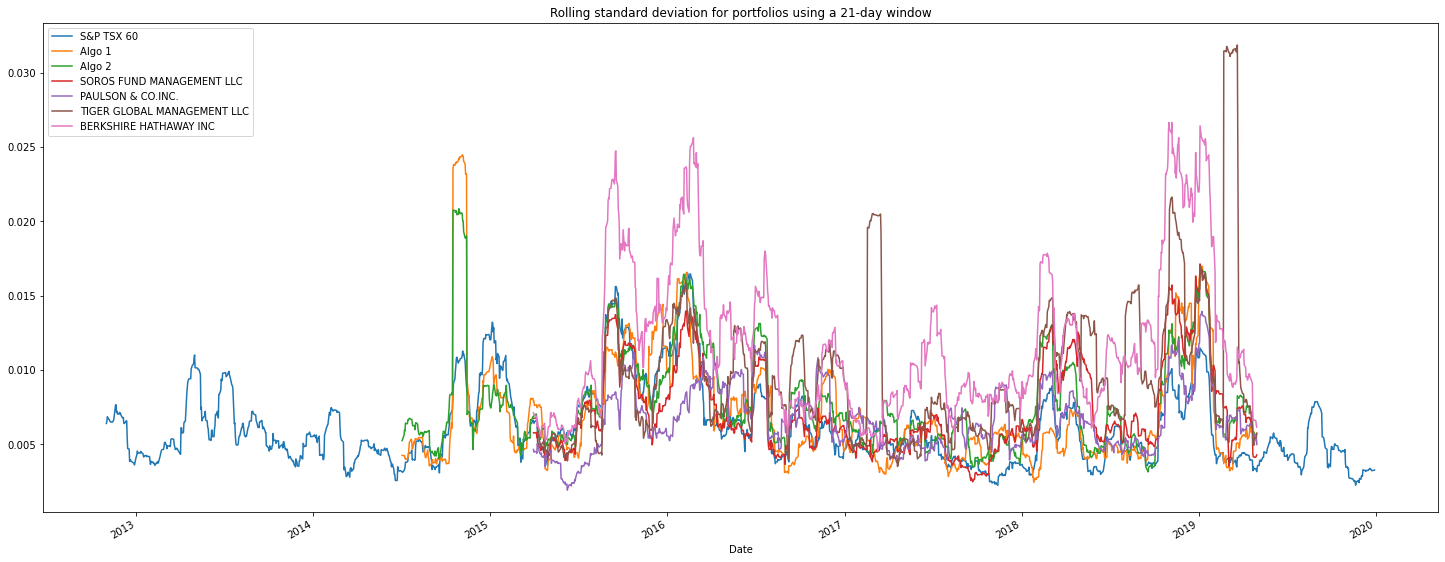

In [427]:
ax=sp_21.plot(figsize=(25,10), title="Rolling standard deviation for portfolios using a 21-day window")
algo_21.plot(ax=ax)
whale_21.plot(ax=ax)

### Calculate and plot the correlation

In [428]:
# Calculate the correlation
correlation = combined_df.corr()
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

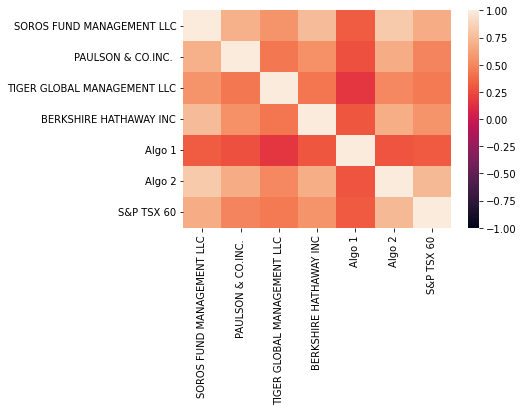

In [429]:
 # Create a heatmap from the correlation values and adjust the scale
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

Algo 1 covariance: Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000002
2019-04-26    0.000002
2019-04-29    0.000002
2019-04-30    0.000002
2019-05-01    0.000002
Length: 1029, dtype: float64
Algo 2 covariance: Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Length: 1029, dtype: float64
S&P TSX 60 variance: Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX 60, Length: 1029, dtype: float64
Algo1 Beta: Date
2015-03-03         NaN
2015-03-04         NaN

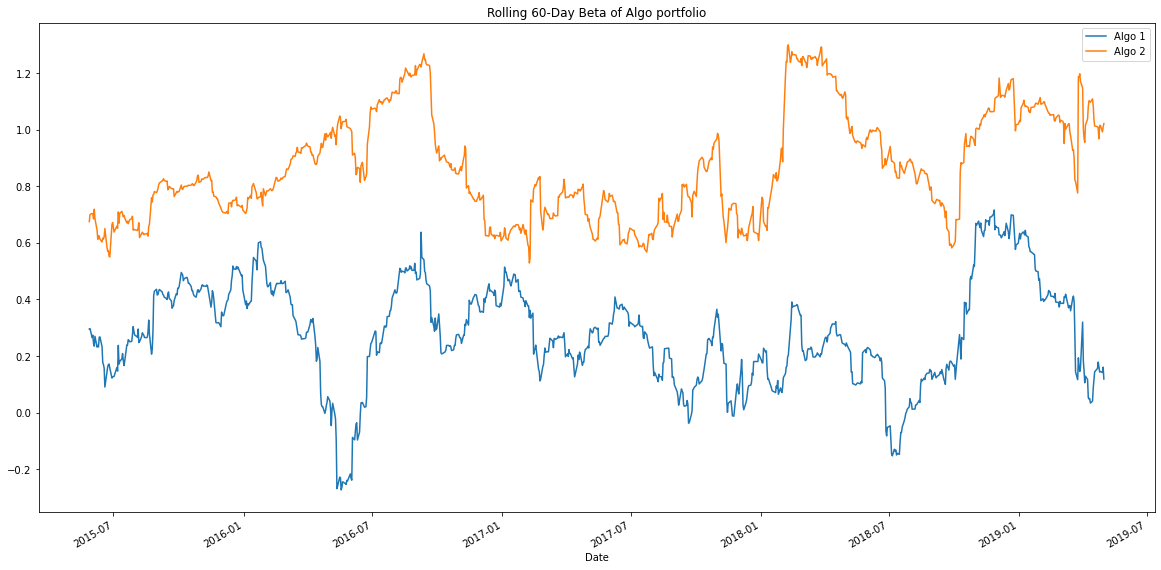

In [433]:
# Calculate covariance of all daily returns of social media stocks vs. S&P 500
algo1_covariance = combined_df["Algo 1"].rolling(window=60).cov(combined_df["S&P TSX 60"])
algo2_covariance = combined_df["Algo 2"].rolling(window=60).cov(combined_df["S&P TSX 60"])

# Display the covariance of each social media stock
print(f"Algo 1 covariance: {algo1_covariance}")
print(f"Algo 2 covariance: {algo2_covariance}")

# Calculate variance of S&P TSX
variance = combined_df["S&P TSX 60"].rolling(window=60).var()

# Diplay S&P 500 variance
print(f"S&P TSX 60 variance: {variance}")

# Computing beta
# Calculate beta of all daily returns of social media stocks
algo1_beta = algo1_covariance / variance
algo2_beta = algo2_covariance / variance

# Display the beta value of each social media stock
print(f"Algo1 Beta: {algo1_beta} | Algo2 Beta: {algo2_beta} ")

# Plot beta trend
ax = algo1_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta of Algo portfolio")
algo2_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Algo 1", "Algo 2"])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

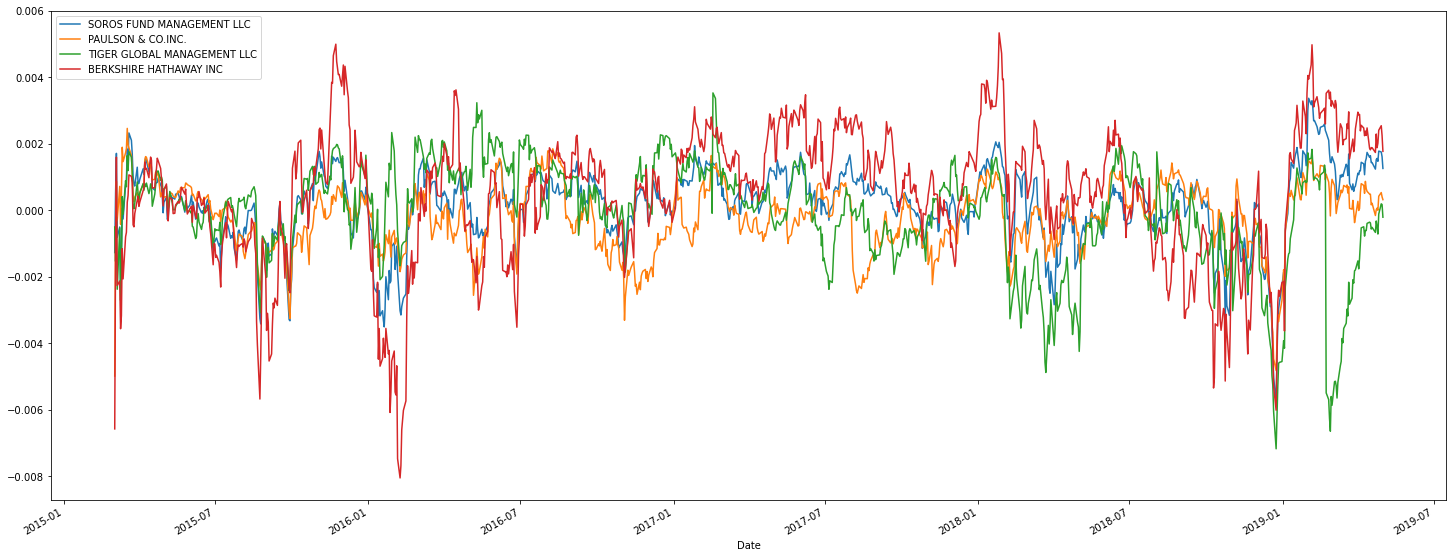

In [435]:
# Use `ewm` to calculate the rolling window of whale portfolio (21-day half-life)
whale_ewm_21 = whale_df.ewm(halflife='21 days', times=whale_df.index).mean()

# Plot the emw of whale portfolio
whale_ewm_21.plot(figsize=(25,10))

<AxesSubplot:xlabel='Date'>

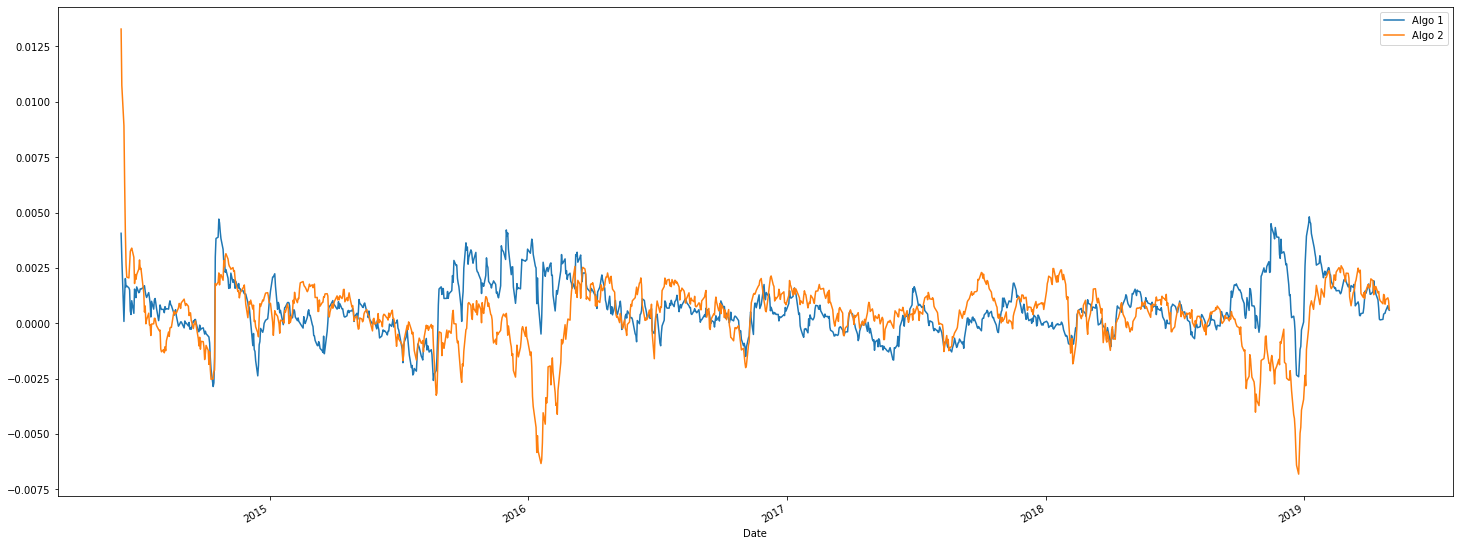

In [436]:
# Use `ewm` to calculate the rolling window of algo portfolio (21-day half-life)
algo_ewm_21 = algo_df.ewm(halflife='21 days', times=algo_df.index).mean()

# Plot the emw of whale portfolio
algo_ewm_21.plot(figsize=(25,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [437]:
# Annualized Sharpe Ratios
all_portfolio_std=combined_df.std()
sharpe_ratios = (combined_df.mean() * 252) / (all_portfolio_std * np.sqrt(252))
sharpe_ratios.head(10)

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

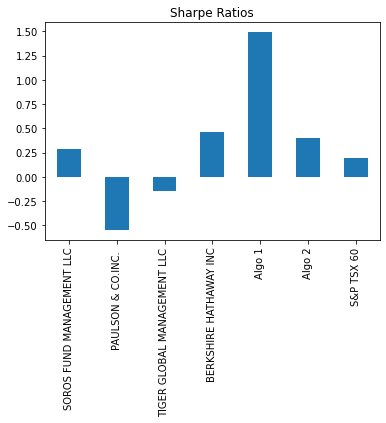

In [438]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [439]:
# Annualized Sharpe Ratios of whale portfolio
whale_sharp_ratios= (whale_df.mean()*252)/(whale_std_annual*np.sqrt(252))
whale_sharp_ratios

SOROS FUND MANAGEMENT LLC      0.022777
PAULSON & CO.INC.             -0.029111
TIGER GLOBAL MANAGEMENT LLC   -0.007450
BERKSHIRE HATHAWAY INC         0.039033
dtype: float64

In [440]:
# Annualized Sharpe Ratios of algo portfolio
algo_sharp_ratios= (algo_df.mean()*252)/(algo_std_annual*np.sqrt(252))
algo_sharp_ratios

Algo 1    0.081903
Algo 2    0.040269
dtype: float64

In [441]:
# Annualized Sharpe Ratios of S&P
sptsx_sharp_ratios= (sptsx_returns.mean()*252)/(sp_std_annual*np.sqrt(252))
sptsx_sharp_ratios

S&P TSX 60    0.030166
dtype: float64

In [442]:
 # Averaging sharpe ratios
whale_sharp_avg = whale_sharp_ratios.mean()
algo_sharp_avg = algo_sharp_ratios.mean()
sp_sharp_avg= sptsx_sharp_ratios.mean()

# Display results
print("Whale's sharpe ratio average:", whale_sharp_avg)
print("Algo's sharpe ratio average:", algo_sharp_avg)
print("S&P's sharpe ratio average:", sp_sharp_avg)

Whale's sharpe ratio average: 0.006312128743099079
Algo's sharpe ratio average: 0.061086435272213815
S&P's sharpe ratio average: 0.03016574887093188


# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [443]:
# Reading data from 1st stock (Alibaba)
baba_data = Path("Resources/baba.csv")
baba_df = pd.read_csv(baba_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
baba_df.head()

,Close
Date,
2018-01-02,183.65
2018-01-03,184.00
2018-01-04,185.71
2018-01-05,190.70
2018-01-08,190.33


In [444]:
# Reading data from 2nd stock (Amazon)
amzn_data = Path("Resources/amzn.csv")
amzn_df = pd.read_csv(amzn_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
amzn_df.head()

,Close
Date,
2018-01-02,59.45
2018-01-03,60.21
2018-01-04,60.48
2018-01-05,61.46
2018-01-08,62.34


In [445]:
# Reading data from 3rd stock (TESLA)
tsla_data = Path("Resources/tsla.csv")
tsla_df = pd.read_csv(tsla_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
tsla_df.head()

,Close
Date,
2018-01-02,64.11
2018-01-03,63.45
2018-01-04,62.92
2018-01-05,63.32
2018-01-08,67.28


In [456]:
# Combine all stocks in a single DataFrame
myportfo_df = pd.concat([baba_df, amzn_df, tsla_df], axis="columns", join="inner")

myportfo_df.head()

,Close,Close,Close
Date,,,
2018-01-02,183.65,59.45,64.11
2018-01-03,184.00,60.21,63.45
2018-01-04,185.71,60.48,62.92
2018-01-05,190.70,61.46,63.32
2018-01-08,190.33,62.34,67.28


In [457]:
# Reset Date index
myportfo_df=myportfo_df.sort_index()

In [458]:
# Reorganize portfolio data by having a column per symbol
myportfo_df.columns = ["Alibaba", "Amazon", "TESLA"]
myportfo_df.head()

,Alibaba,Amazon,TESLA
Date,,,
2018-01-02,183.65,59.45,64.11
2018-01-03,184.00,60.21,63.45
2018-01-04,185.71,60.48,62.92
2018-01-05,190.70,61.46,63.32
2018-01-08,190.33,62.34,67.28


In [459]:
# Calculate daily returns
myportfo_returns = myportfo_df.pct_change()

# Drop NAs
myportfo_returns.dropna()

# Display sample data
myportfo_returns.sample(10)


,Alibaba,Amazon,TESLA
Date,,,
2020-03-02,0.014327,0.037265,0.113174
2020-10-26,-0.009841,0.000811,-0.000832
2019-11-22,0.010386,0.006341,-0.061434
2019-11-06,0.011868,-0.003330,0.029634
2020-06-18,-0.003166,0.004922,0.012250
2021-07-20,0.008042,0.006649,0.022098
2021-10-04,-0.031692,-0.028448,0.008140
2019-08-29,0.031825,0.012584,0.028293
2019-07-24,0.003257,0.003209,0.018259


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [460]:
# Set weights
myweights = [1/3, 1/3, 1/3]
myportfo_r_w = myportfo_returns.dot(myweights)

# Calculate cumulative returns of Whale Portfo
myportfo_cumulative = (1 + myportfo_r_w).cumprod()-1

# Display sample values
myportfo_cumulative.head()

Date
2018-01-02         NaN
2018-01-03    0.001465
2018-01-04    0.003276
2018-01-05    0.019807
2018-01-08    0.045274
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [461]:
# Join your returns DataFrame to the original returns DataFrame
allportfo_df = pd.concat([combined_df, myportfo_returns], axis="columns", join="inner")

allportfo_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Alibaba,Amazon,TESLA
Date,,,,,,,,,,
2018-01-02,0.014546,0.015045,-0.004784,0.031017,0.001254,0.017222,0.006222,NaN,NaN,NaN
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.001906,0.012784,-0.010295
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.009293,0.004484,-0.008353
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.026870,0.016204,0.006357
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.001940,0.014318,0.062539


In [462]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
allportfo_df=allportfo_df.dropna()
allportfo_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Alibaba,Amazon,TESLA
Date,,,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.001906,0.012784,-0.010295
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.009293,0.004484,-0.008353
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.026870,0.016204,0.006357
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.001940,0.014318,0.062539
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,0.002469,0.004812,-0.008026


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [463]:
# Calculate the annualized `std`
myportfo_std_annual = myportfo_returns.std() * np.sqrt(252)
myportfo_std_annual

Alibaba     0.451424
Amazon     12.815538
TESLA       0.659891
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

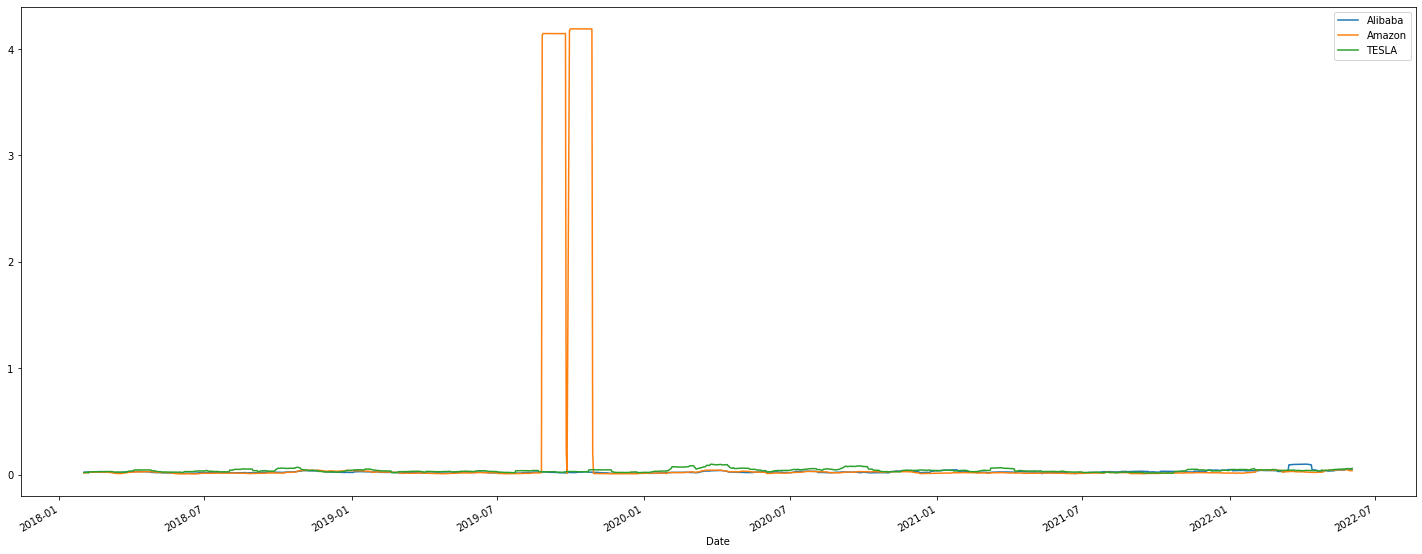

In [464]:
# Calculate rolling standard deviation of my portfolio
myportfo_returns_21 = myportfo_returns.rolling(window=21).std()

# Plot the rolling standard deviation of my portfolio
myportfo_returns_21.plot(figsize=(25,10))


<AxesSubplot:xlabel='Date'>

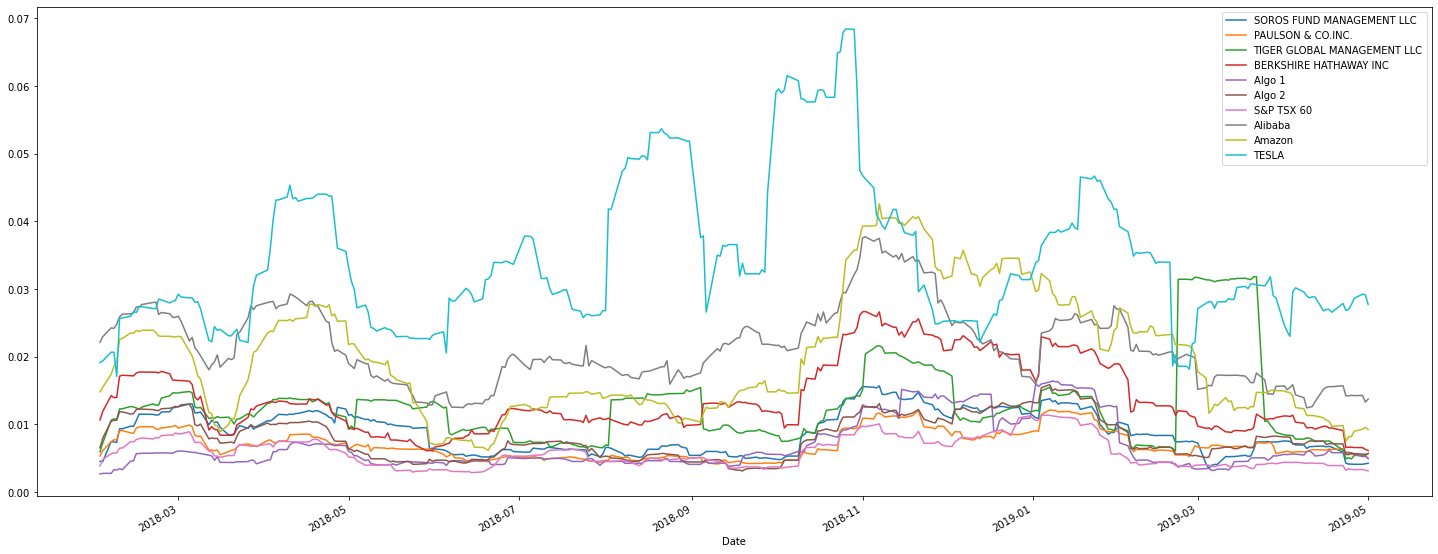

In [466]:
# Calculate rolling standard deviation for all portfolio
allportfo_21 = allportfo_df.rolling(window=21).std()

# Plot the rolling standard deviation for all portfolio
allportfo_21.plot(figsize=(25,10))

### Calculate and plot the correlation

In [467]:
# Calculate and plot the correlation
correlation = allportfo_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60,Alibaba,Amazon,TESLA
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.582648,0.656534,0.299316
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.508235,0.562966,0.233862
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.301525,0.349539,0.176618
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.791131,0.773999,0.353755
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.254207,0.289275,0.072260
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.603805,0.688939,0.306862
S&P TSX 60,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.519134,0.540124,0.195725
Alibaba,0.582648,0.508235,0.301525,0.791131,0.254207,0.603805,0.519134,1.000000,0.640684,0.245661
Amazon,0.656534,0.562966,0.349539,0.773999,0.289275,0.688939,0.540124,0.640684,1.000000,0.295942
TESLA,0.299316,0.233862,0.176618,0.353755,0.072260,0.306862,0.195725,0.245661,0.295942,1.000000


<AxesSubplot:>

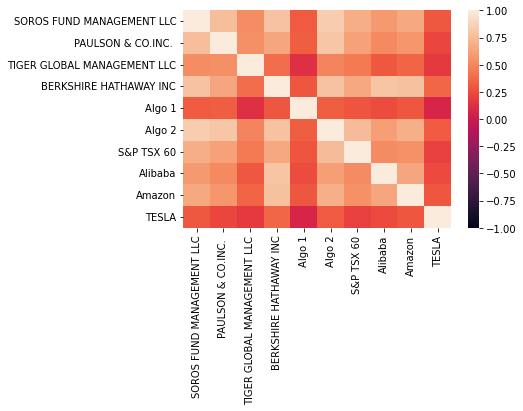

In [468]:
 # Create a heatmap from the correlation values and adjust the scale
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

Alibaba covariance: Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2019-04-25    0.000017
2019-04-26    0.000016
2019-04-29    0.000016
2019-04-30    0.000016
2019-05-01    0.000015
Length: 328, dtype: float64
Amazon covariance: Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2019-04-25    0.000026
2019-04-26    0.000027
2019-04-29    0.000026
2019-04-30    0.000023
2019-05-01    0.000024
Length: 328, dtype: float64
TESLA covariance: Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2019-04-25    0.000011
2019-04-26    0.000010
2019-04-29    0.000009
2019-04-30    0.000010
2019-05-01    0.000011
Length: 328, dtype: float64
S&P TSX 60 variance: Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05   

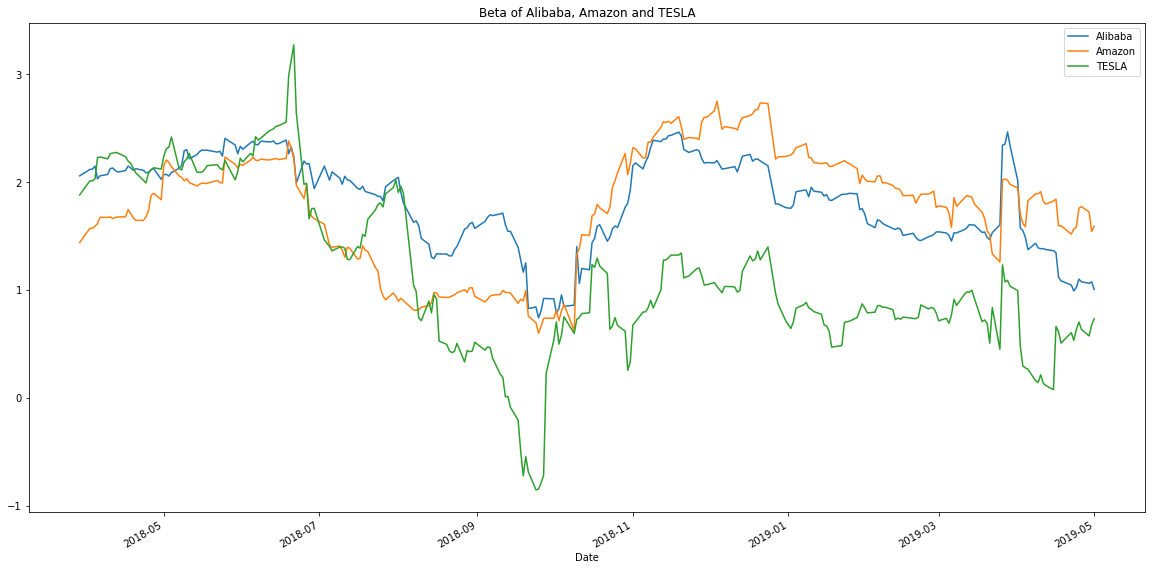

In [469]:
# Calculate covariance of a single portfolio
# Calculate covariance of all daily returns of social media stocks vs. S&P 500
baba_covariance = allportfo_df["Alibaba"].rolling(window=60).cov(allportfo_df["S&P TSX 60"])
amazon_covariance = allportfo_df["Amazon"].rolling(window=60).cov(allportfo_df["S&P TSX 60"])
tesla_covariance = allportfo_df["TESLA"].rolling(window=60).cov(allportfo_df["S&P TSX 60"])

# Display the covariance of each social media stock
print(f"Alibaba covariance: {baba_covariance}")
print(f"Amazon covariance: {amazon_covariance}")
print(f"TESLA covariance: {tesla_covariance}")

# Calculate variance of S&P TSX
variance = allportfo_df["S&P TSX 60"].rolling(window=60).var()

# Diplay S&P 500 variance
print(f"S&P TSX 60 variance: {variance}")

# Computing beta
# Calculate beta of all daily returns of social media stocks
baba_beta = baba_covariance / variance
amazon_beta = amazon_covariance / variance
tesla_beta = tesla_covariance / variance

# Display the beta value of each social media stock
print(f"Alibaba: {baba_beta} | Amazon: {amazon_beta} | TESLA: {tesla_beta}")

# Plot beta trend
 # Set the figure and plot the different social media beta values as multiple trends on the same figure
ax = baba_beta.plot(figsize=(20, 10), title="Beta of Alibaba, Amazon and TESLA")
amazon_beta.plot(ax=ax)
tesla_beta.plot(ax=ax)


# Set the legend of the figure
ax.legend(["Alibaba", "Amazon", "TESLA"])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [470]:
# Calculate Annualized Sharpe Ratios
# Annualized Sharpe Ratios
all_portfolio_std=allportfo_df.std()
sharpe_ratios_2 = (allportfo_df.mean() * 252) / (all_portfolio_std * np.sqrt(252))
sharpe_ratios_2.head(10)


SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396281
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX 60                     0.034651
Alibaba                        0.176863
Amazon                         1.017674
TESLA                         -0.175173
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

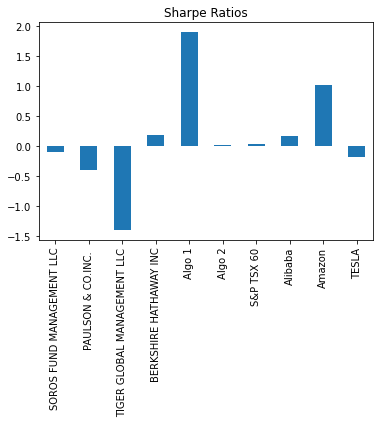

In [362]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot.bar(title="Sharpe Ratios")